<h1>Deep Neural Networks with Keras</h1>
In this tutorial I will explain how to classify the MNIST dataset using DNNs (Deep Neural Network). The code will be written using python with the help of Keras library which is a high level library and i am going to use TensorFlow as it's backend.

  Now let's import Keras and some other useful libraries that we are gonna use later and also we will load the data from keras databases for later use.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
np.random.seed(0)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


<h1>Data Exploration</h1>
Let's explore the data we have as this will give us a hint on the algorithm we will use if we have to choose. Exploring data is also very important because it will tell you which accuracy metric you are going to use, if the data is balanced which means all the classes have fair contribution in the dataset regarding its numbers then we can easily use accuracy, But if the data is skewed then we won't be able to use accurace as it's results will be misleading and we may use F-beta score instead.

the number of training examples = 60000
the number of classes = 10
Dimention of images = 28 x 28  
The number of occuranc of each class in the dataset = {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}  



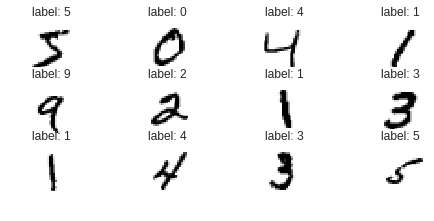

In [2]:
print("the number of training examples = %i" % x_train.shape[0])
print("the number of classes = %i" % len(np.unique(y_train)))
print("Dimention of images = {:d} x {:d}  ".format(x_train[1].shape[0],x_train[1].shape[1])  )

#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= np.unique(y_train, return_counts=True)
print("The number of occuranc of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

#Normalizing the input dataset
x_train = x_train / 255
x_test = x_test / 255
 
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label)

From the previous results we can see that the dataset consists of 60000 training example each is an image of dimention 28 * 28. We can see that the number of occurances of each class is almost balanced and based on that it is safe to use accuracy as our metric later.

<h1>Algorithm Choice</h1>
In this tutorial we will use the Deep Neural Networks Algorithm. Deep Neural Networks consists of a building block called the neuron. Each neural network consists of levels and each level consists of neurons. A neuron in the NN layer outputs discrete values for a classification task so it even fires or doesn't fire.
![Deep Neural Network example](https://raw.githubusercontent.com/MoghazyCoder/Machine-Learning-Tutorials/master/Deep.png)

Neurons uses the equation that determines whether or not it will fire. each neuron outputs the result from applying the function a(z) where a() is the activation function and z is the linear function WX + b and passes it to the next layer neurons. One of the mostly used activation function is the Relu function that is because it solves the problem of the exploding gradient, You can read more about that [here](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/).

<h1>Parameter and Model Selection</h1>
Now Let's fit the model. We will make a sequential model which is a stack of layers, each layer passes the output to the next layer. we must reshape the input data to make the image a 1d vector instead to be able to pass it to the Deep Neural Network.

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

#reshape the inputs
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print(x_train.shape )
print(x_train.shape )


#Makine the outputs 1-hot vector of 10 elements
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


model = Sequential()
model.add(Dense(units=1024, activation='relu', input_dim= 784 ) )
model.add(Dense(units=1024, activation='relu' ))
model.add(Dense(units=512, activation='relu'  ))
model.add(Dense(units=512, activation='relu'  ))

#and now the output layer which will have 10 units to
#output a 1-hot vector to detect one of the 10 classes
model.add(Dense(units=10, activation='softmax'))

(60000, 784)
(60000, 784)


Let's configure the learning process and choose the suitable parameters.we will use [catagorical cross entropy as the loss finction](http://neuralnetworksanddeeplearning.com/chap3.html), adam optimizer which  is an efficient gradient descent algorithm that proved to work well and our performance metric will be the accuracy.

In [0]:
from keras import optimizers

optimizer = optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Now it is time to train the Network. We will use an early stopping function to stp the training if the validation loss doesn't change with patience of 50 epochs

In [5]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='min')
model.fit(x_train, y_train, epochs=30, batch_size=200, validation_split=0.2, verbose=1, callbacks=[earlystopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 119us/step - loss: 0.2443 - acc: 0.9240 - val_loss: 0.1284 - val_acc: 0.9641
Epoch 2/30
48000/48000 [==============================] - 4s 87us/step - loss: 0.0890 - acc: 0.9736 - val_loss: 0.1091 - val_acc: 0.9709
Epoch 3/30
48000/48000 [==============================] - 4s 89us/step - loss: 0.0521 - acc: 0.9847 - val_loss: 0.0910 - val_acc: 0.9728
Epoch 4/30
 5600/48000 [==>...........................] - ETA: 3s - loss: 0.0285 - acc: 0.9916

48000/48000 [==============================] - 4s 90us/step - loss: 0.0339 - acc: 0.9895 - val_loss: 0.1037 - val_acc: 0.9745
Epoch 5/30
48000/48000 [==============================] - 5s 94us/step - loss: 0.0270 - acc: 0.9916 - val_loss: 0.1038 - val_acc: 0.9749
Epoch 6/30
48000/48000 [==============================] - 4s 89us/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.0950 - val_acc: 0.9776
Epoch 7/30
48000/48000 [==============================] - 4s 91us/step - loss: 0.0136 - acc: 0.9962 - val_loss: 0.0939 - val_acc: 0.9798
Epoch 8/30
17200/48000 [=========>....................] - ETA: 2s - loss: 0.0081 - acc: 0.9976

48000/48000 [==============================] - 5s 94us/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.1062 - val_acc: 0.9777
Epoch 9/30
48000/48000 [==============================] - 4s 88us/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0997 - val_acc: 0.9803
Epoch 10/30
48000/48000 [==============================] - 4s 88us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.1014 - val_acc: 0.9803
Epoch 11/30
48000/48000 [==============================] - 4s 85us/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.1145 - val_acc: 0.9792
Epoch 12/30
24000/48000 [==============>...............] - ETA: 2s - loss: 0.0070 - acc: 0.9982

48000/48000 [==============================] - 4s 90us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.1207 - val_acc: 0.9793
Epoch 13/30
48000/48000 [==============================] - 4s 86us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0962 - val_acc: 0.9810
Epoch 14/30
48000/48000 [==============================] - 4s 87us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.1255 - val_acc: 0.9778
Epoch 15/30
48000/48000 [==============================] - 4s 89us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.1006 - val_acc: 0.9822
Epoch 16/30
27000/48000 [===============>..............] - ETA: 1s - loss: 8.0114e-04 - acc: 0.9999

48000/48000 [==============================] - 4s 88us/step - loss: 6.2554e-04 - acc: 0.9999 - val_loss: 0.1028 - val_acc: 0.9828
Epoch 17/30
48000/48000 [==============================] - 4s 87us/step - loss: 7.7500e-05 - acc: 1.0000 - val_loss: 0.1057 - val_acc: 0.9828
Epoch 18/30
48000/48000 [==============================] - 4s 86us/step - loss: 2.0604e-05 - acc: 1.0000 - val_loss: 0.1077 - val_acc: 0.9828
Epoch 19/30
48000/48000 [==============================] - 4s 87us/step - loss: 1.3352e-05 - acc: 1.0000 - val_loss: 0.1115 - val_acc: 0.9830
Epoch 20/30
25200/48000 [==============>...............] - ETA: 1s - loss: 9.2159e-06 - acc: 1.0000

48000/48000 [==============================] - 4s 85us/step - loss: 8.1608e-06 - acc: 1.0000 - val_loss: 0.1158 - val_acc: 0.9832
Epoch 21/30
48000/48000 [==============================] - 4s 88us/step - loss: 5.1600e-06 - acc: 1.0000 - val_loss: 0.1196 - val_acc: 0.9831
Epoch 22/30
48000/48000 [==============================] - 4s 88us/step - loss: 3.5717e-06 - acc: 1.0000 - val_loss: 0.1224 - val_acc: 0.9833
Epoch 23/30
48000/48000 [==============================] - 4s 86us/step - loss: 2.6800e-06 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9833
Epoch 24/30
23000/48000 [=============>................] - ETA: 1s - loss: 2.0880e-06 - acc: 1.0000

48000/48000 [==============================] - 4s 85us/step - loss: 2.1315e-06 - acc: 1.0000 - val_loss: 0.1266 - val_acc: 0.9833
Epoch 25/30
48000/48000 [==============================] - 4s 86us/step - loss: 1.7541e-06 - acc: 1.0000 - val_loss: 0.1281 - val_acc: 0.9833
Epoch 26/30
48000/48000 [==============================] - 4s 85us/step - loss: 1.4878e-06 - acc: 1.0000 - val_loss: 0.1295 - val_acc: 0.9832
Epoch 27/30
48000/48000 [==============================] - 4s 84us/step - loss: 1.2798e-06 - acc: 1.0000 - val_loss: 0.1305 - val_acc: 0.9832
Epoch 28/30
25200/48000 [==============>...............] - ETA: 1s - loss: 1.0388e-06 - acc: 1.0000

48000/48000 [==============================] - 4s 86us/step - loss: 1.1199e-06 - acc: 1.0000 - val_loss: 0.1314 - val_acc: 0.9833
Epoch 29/30
48000/48000 [==============================] - 4s 89us/step - loss: 9.9564e-07 - acc: 1.0000 - val_loss: 0.1323 - val_acc: 0.9834
Epoch 30/30
48000/48000 [==============================] - 4s 85us/step - loss: 8.9254e-07 - acc: 1.0000 - val_loss: 0.1331 - val_acc: 0.9834


Now we should evaluate the model on the test set

In [6]:
print ("Test Accuracy when evaluated on the X_test and the y test = %f"% (model.evaluate(x_test, y_test, batch_size=128)[1]*100), "%" )

10000/10000 [==============================] - 0s 30us/step
Test Accuracy when evaluated on the X_test and the y test = 98.530000 %
